In [1]:
# load packages
from sklearn import metrics,preprocessing,model_selection
from sklearn.metrics import accuracy_score
import keras
from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en import English
parser = English()

import pandas as pd # provide sql-like data manipulation tools. very handy.
pd.options.mode.chained_assignment = None
import numpy as np # high dimensional vector computing library.
from copy import deepcopy
from string import punctuation
from random import shuffle

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()
from gensim.models.doc2vec import TaggedDocument



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras import backend as K
from sklearn.tree import DecisionTreeClassifier

In [186]:
elmo = hub.load('/Users/andrewsimon/Downloads/elmo_3')

In [187]:
main_data = pd.read_csv('/Users/andrewsimon/Desktop/Dow_dat.csv')

In [171]:
main_data

,Level,Report
0,2,"On April 10th at 12:30 PM, there was an incide..."
1,3,"On April 8th at 9:00 PM, a fire broke out in t..."
2,4,"On April 6th at 2:45 AM, there was an incident..."
3,1,"On April 5th at 7:15 PM, there was an unplanne..."
4,5,"On April 2nd at 11:30 AM, there was a minor in..."
...,...,...
295,3,"At 9:45 AM, a worker reported a small leak of ..."
296,5,"At 2:30 PM, a worker reported a small spill of..."
297,4,"At 6:15 AM, a worker reported an unusual odor ..."
298,2,"At 11:00 AM, a worker reported a small fire in..."


In [151]:
main_data['sentiment'] = main_data['sentiment'].map(
        {'positive': 1, 'negative': 0})

In [64]:
main_data['title'] = main_data['Report'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [172]:
main_data = main_data.sample(n=100)

In [173]:
main_data = main_data.reset_index()

In [188]:
main_data

,Level,Report
0,2,"On April 10th at 12:30 PM, there was an incide..."
1,3,"On April 8th at 9:00 PM, a fire broke out in t..."
2,4,"On April 6th at 2:45 AM, there was an incident..."
3,1,"On April 5th at 7:15 PM, there was an unplanne..."
4,5,"On April 2nd at 11:30 AM, there was a minor in..."
...,...,...
295,3,"At 9:45 AM, a worker reported a small leak of ..."
296,5,"At 2:30 PM, a worker reported a small spill of..."
297,4,"At 6:15 AM, a worker reported an unusual odor ..."
298,2,"At 11:00 AM, a worker reported a small fire in..."


In [189]:
embeddings = []

for sentence in main_data['Report']:
    tensor = tf.constant([sentence])
    embedding = elmo.signatures['default'](tensor)['elmo']
    embedding = tf.reduce_mean(embedding, 1)
    embeddings.append(embedding)


In [53]:
main_data.drop(columns=['Report'])

,Level,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,3,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,4,NaN,NaN,NaN
3,1,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
95,3,NaN,NaN,NaN
96,5,NaN,NaN,NaN
97,4,NaN,NaN,NaN
98,2,NaN,NaN,NaN


In [176]:
scores_3 = []
temp_score = 0

for n in range(250):
    print(n)
    X_train, X_test, y_train, y_test = train_test_split(embeddings,
                                                    main_data['Level'], test_size=0.2, random_state=n)
    
    X_train = np.array(X_train)
    X_train = X_train.reshape(80, 1024)
    X_test = np.array(X_test)
    X_test = X_test.reshape(20, 1024)

    rf = RandomForestClassifier(n_estimators=4974, min_weight_fraction_leaf=0.008440029412940517, max_depth=18).fit(X_train, y_train)
    score = rf.score(X_test, y_test)

    scores_3.append(score)
    

    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [126]:
scores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [169]:
min(scores_2)

0.5333333333333333

In [190]:
X_train, X_test, y_train, y_test = train_test_split(embeddings,
                                                    main_data['Level'], test_size=0.2, random_state=42)

In [179]:
import random
scores_samp = random.sample(scores, 250)

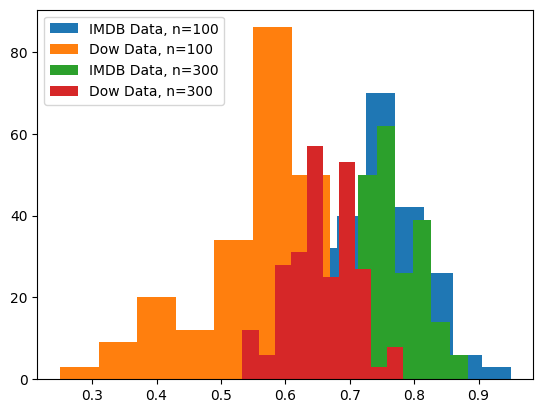

In [185]:
from matplotlib import pyplot as plt

plt.hist(scores_samp, label='IMDB Data, n=100')
plt.hist(scores_3, label= 'Dow Data, n=100')
plt.hist(scores_1,label='IMDB Data, n=300')
plt.hist(scores_2, label = "Dow Data, n=300")
plt.legend()
plt.show()

In [191]:
X_train = np.array(X_train)
X_train = X_train.reshape(240, 1024)

X_test = np.array(X_test)
X_test = X_test.reshape(60, 1024)

X_train.shape

(240, 1024)

In [70]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression( max_iter = 100000)
classifier.fit(X_train_scaled, y_train)
predictions_LR = classifier.predict(X_test_scaled)
score = classifier.score(X_test_scaled, y_test)
score

NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(X_train, y_train)
predictions_DT = clf_decision_tree.predict(X_test)
acc_score = accuracy_score(y_test, predictions_DT)
acc_score

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1100).fit(X_train, y_train)
predictions = rf.predict(X_test)
score = rf.score(X_test, y_test)
score

0.75

In [ ]:
X_train.shape

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
X_train_new = []


for i in X_train:
    sub_X_train_new = []
    for j in i:
        sub_X_train_new.append(j)
    X_train_new.append(sub_X_train_new)


X_train_new = np.array(X_train_new)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 1.1934 - accuracy: 0.7667 - 65ms/epoch - 33ms/step


In [81]:
import tensorflow as tf

model = tf.keras.Sequential([
     tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=2)



Epoch 1/100
15/15 - 0s - loss: 1.6128 - accuracy: 0.2458 - 193ms/epoch - 13ms/step
Epoch 2/100


/Users/andrewsimon/Library/Python/3.8/lib/python/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 - 0s - loss: 1.3212 - accuracy: 0.4625 - 51ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 1.0842 - accuracy: 0.5458 - 72ms/epoch - 5ms/step
Epoch 4/100
15/15 - 0s - loss: 1.0033 - accuracy: 0.5500 - 43ms/epoch - 3ms/step
Epoch 5/100
15/15 - 0s - loss: 0.9090 - accuracy: 0.6250 - 33ms/epoch - 2ms/step
Epoch 6/100
15/15 - 0s - loss: 0.8179 - accuracy: 0.6667 - 31ms/epoch - 2ms/step
Epoch 7/100
15/15 - 0s - loss: 0.7775 - accuracy: 0.6917 - 32ms/epoch - 2ms/step
Epoch 8/100
15/15 - 0s - loss: 0.7318 - accuracy: 0.7021 - 32ms/epoch - 2ms/step
Epoch 9/100
15/15 - 0s - loss: 0.7056 - accuracy: 0.6792 - 34ms/epoch - 2ms/step
Epoch 10/100
15/15 - 0s - loss: 0.6390 - accuracy: 0.7563 - 33ms/epoch - 2ms/step
Epoch 11/100
15/15 - 0s - loss: 0.6180 - accuracy: 0.7521 - 34ms/epoch - 2ms/step
Epoch 12/100
15/15 - 0s - loss: 0.5713 - accuracy: 0.7875 - 36ms/epoch - 2ms/step
Epoch 13/100
15/15 - 0s - loss: 0.5242 - accuracy: 0.8125 - 38ms/epoch - 3ms/step
Epoch 14/100
15/15 - 0s - loss: 0.56

In [76]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

4/4 - 0s - loss: 0.3269 - accuracy: 0.9250 - 66ms/epoch - 17ms/step


In [94]:
preds = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [95]:
len(preds[0])

6

In [96]:
predsls

array([[2.59356834e-02, 9.99866962e-01, 2.20301747e-02, 8.21515977e-01,
        4.48623627e-01, 4.70394781e-03],
       [1.08756116e-02, 4.96712565e-01, 7.51141191e-01, 9.85620558e-01,
        4.50951457e-01, 8.21731519e-03],
       [1.64520573e-02, 2.62543801e-02, 7.19634473e-01, 7.93732345e-01,
        6.21681325e-02, 9.87076044e-01],
       [2.57021822e-02, 5.34225702e-02, 1.08930141e-01, 6.01479828e-01,
        1.63410474e-02, 9.99921799e-01],
       [1.12405065e-02, 2.75147315e-02, 9.80063498e-01, 8.78454864e-01,
        8.89253199e-01, 6.01646909e-03],
       [1.36131439e-02, 1.22215636e-01, 8.88317823e-01, 7.43446112e-01,
        9.85991597e-01, 1.52226794e-03],
       [1.19785974e-02, 7.57989138e-02, 9.40314353e-01, 6.37489736e-01,
        9.79413927e-01, 4.37396392e-03],
       [1.45110376e-02, 7.13098422e-02, 5.18852830e-01, 8.13719511e-01,
        9.89077985e-01, 1.24637550e-02],
       [1.09913731e-02, 9.08644944e-02, 8.91994476e-01, 9.55794215e-01,
        8.54385436e-01, 

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

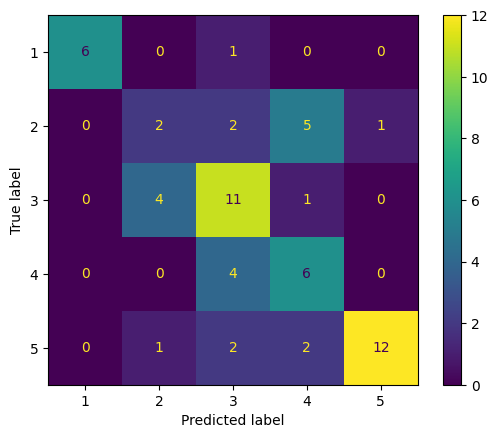

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

len(y_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
SVM_predict = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

In [ ]:
len(y_test)
cm = confusion_matrix(y_test, SVM_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5])
disp.plot()